In [28]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [30]:
customers = pd.read_csv('customer_segmentation.csv')

# Insights from initial data

In [31]:
print(customers.shape)
print(customers.dtypes)
print(customers.isna().sum())
customers.corr()

(10127, 14)
customer_id                   int64
age                           int64
gender                       object
dependent_count               int64
education_level              object
marital_status               object
estimated_income              int64
months_on_book                int64
total_relationship_count      int64
months_inactive_12_mon        int64
credit_limit                float64
total_trans_amount            int64
total_trans_count             int64
avg_utilization_ratio       float64
dtype: object
customer_id                 0
age                         0
gender                      0
dependent_count             0
education_level             0
marital_status              0
estimated_income            0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
credit_limit                0
total_trans_amount          0
total_trans_count           0
avg_utilization_ratio       0
dtype: int64


,customer_id,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
customer_id,1.000000,0.007613,0.006772,0.015787,0.134588,0.006907,0.005729,0.005708,-0.019692,-0.002961,0.000266
age,0.007613,1.000000,-0.122254,0.032922,0.788912,-0.010931,0.054361,0.002476,-0.046446,-0.067097,0.007114
dependent_count,0.006772,-0.122254,1.000000,0.051620,-0.103062,-0.039076,-0.010768,0.068065,0.025046,0.049912,-0.037135
estimated_income,0.015787,0.032922,0.051620,1.000000,0.027628,-0.007181,-0.002703,0.515863,0.015861,-0.039988,-0.277532
months_on_book,0.134588,0.788912,-0.103062,0.027628,1.000000,-0.009203,0.074164,0.007507,-0.038591,-0.049819,-0.007541
total_relationship_count,0.006907,-0.010931,-0.039076,-0.007181,-0.009203,1.000000,-0.003675,-0.071386,-0.347229,-0.241891,0.067663
months_inactive_12_mon,0.005729,0.054361,-0.010768,-0.002703,0.074164,-0.003675,1.000000,-0.020394,-0.036982,-0.042787,-0.007503
credit_limit,0.005708,0.002476,0.068065,0.515863,0.007507,-0.071386,-0.020394,1.000000,0.171730,0.075927,-0.482965
total_trans_amount,-0.019692,-0.046446,0.025046,0.015861,-0.038591,-0.347229,-0.036982,0.171730,1.000000,0.807192,-0.083034
total_trans_count,-0.002961,-0.067097,0.049912,-0.039988,-0.049819,-0.241891,-0.042787,0.075927,0.807192,1.000000,0.002838


In [32]:
fig, axes = plt.subplots(3,3, figsize=(15,15))
axes = axes.flatten()

for i, column in enumerate(customers.select_dtypes('int64')):
    x = customers[column].value_counts().index
    y = customers[column].value_counts()
    axes[i].bar(x,y)
    axes[i].set_title(f'Freq of vals in {column}')
plt.tight_layout()
plt.show()

1. The dataset has 10127 rows and 14 columns. It looks like we do not need the CustomerID column to perform the analysis.
2. There are many categorical variables, most are int64 or object data types. We will need to change categorical values into numeric ones.
3. There are no missing values.
4. The strongest correlation in the data set is months on book with age, with a value of 0.79
5. Age has a very normal distribution. The most frequent months on book is 36, liekly due to a 3 year subscription plan. 

# Preprocessing

In [33]:
customers_modif = customers.copy()
customers_modif['gender'] = customers_modif['gender'].apply(lambda x: 1 if x=='M' else 0)
customers_modif['education_level'] = customers_modif['education_level'].map({'Uneducated':0,'High School':1,'College':2,'Graduate':3,'Post-Graduate':4,'Doctorate':5})
customers_modif

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,1,3,1,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,0,5,3,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,1,3,3,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,0,4,1,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,1,3,0,Married,65000,21,5,1,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,1,2,3,Single,51000,40,3,2,4003.0,15476,117,0.462
10123,710638233,41,1,2,3,Divorced,40000,25,4,2,4277.0,8764,69,0.511
10124,716506083,44,0,1,1,Married,33000,36,5,3,5409.0,10291,60,0.000
10125,717406983,30,1,2,3,Unknown,47000,36,4,3,5281.0,8395,62,0.000


In [34]:
customers_modif = pd.get_dummies(customers_modif, columns=['marital_status'],drop_first=True)


In [36]:
X = customers_modif.drop('customer_id', axis=1)

scaler = StandardScaler()
scaler.fit(X)

X_scaled=scaler.transform(X)

array([[-0.16540558,  1.05995565,  0.50336813, -0.75221102,  0.1758098 ,
         0.38462088,  0.76394261, -1.32713603,  0.4466219 , -0.95970657,
        -0.97389518, -0.77588223,  1.07733799, -0.79850685, -0.28260887],
       [ 0.33357038, -0.9434357 ,  2.04319867,  0.66278684, -0.96716585,
         1.01071482,  1.40730617, -1.32713603, -0.04136665, -0.91643261,
        -1.35734038, -0.61627565, -0.92821381,  1.2523374 , -0.28260887],
       [ 0.58305837,  1.05995565,  0.50336813,  0.66278684,  0.78539682,
         0.00896451,  0.12057905, -1.32713603, -0.5736978 , -0.74098169,
        -1.91120566, -0.99715499,  1.07733799, -0.79850685, -0.28260887],
       [-0.78912553, -0.9434357 ,  1.2732834 , -0.75221102, -0.63697289,
        -0.24147306, -0.52278451,  1.64147829, -0.58525108, -0.95175829,
        -1.91120566,  1.75968594, -0.92821381, -0.79850685,  3.53845931],
       [-0.78912553,  1.05995565,  0.50336813, -1.45970995,  0.07421197,
        -1.86931731,  0.76394261, -1.32713603, 

# Clustering

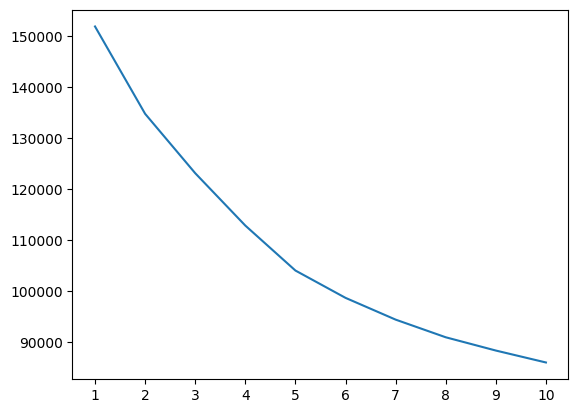

In [235]:
inertias = []
for i in range(1,11):
    model = KMeans(n_clusters = i)
    model.fit_predict(X)
    inertias.append(model.inertia_)

plt.plot(list(range(1,11)), inertias)
plt.xticks(ticks=range(1,11), labels=range(1,11))
plt.show()

#### Inertia Insights
1. It appears as if 5-7 is the ideal number of clusters for our dataset. Let's use 6.

In [39]:
model = KMeans(n_clusters=6)
y = model.fit_predict(X_scaled)
y_series = pd.Series(y)
clusters = y_series.value_counts().index

In [40]:
y

array([0, 5, 0, ..., 1, 4, 1], dtype=int32)

In [41]:
customers['CLUSTER'] = y+1
customers['CLUSTER'] = customers['CLUSTER'].astype('int64')

In [42]:
customers

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,CLUSTER
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061,1
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105,6
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000,1
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760,5
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,M,2,Graduate,Single,51000,40,3,2,4003.0,15476,117,0.462,4
10123,710638233,41,M,2,Graduate,Divorced,40000,25,4,2,4277.0,8764,69,0.511,2
10124,716506083,44,F,1,High School,Married,33000,36,5,3,5409.0,10291,60,0.000,2
10125,717406983,30,M,2,Graduate,Unknown,47000,36,4,3,5281.0,8395,62,0.000,5


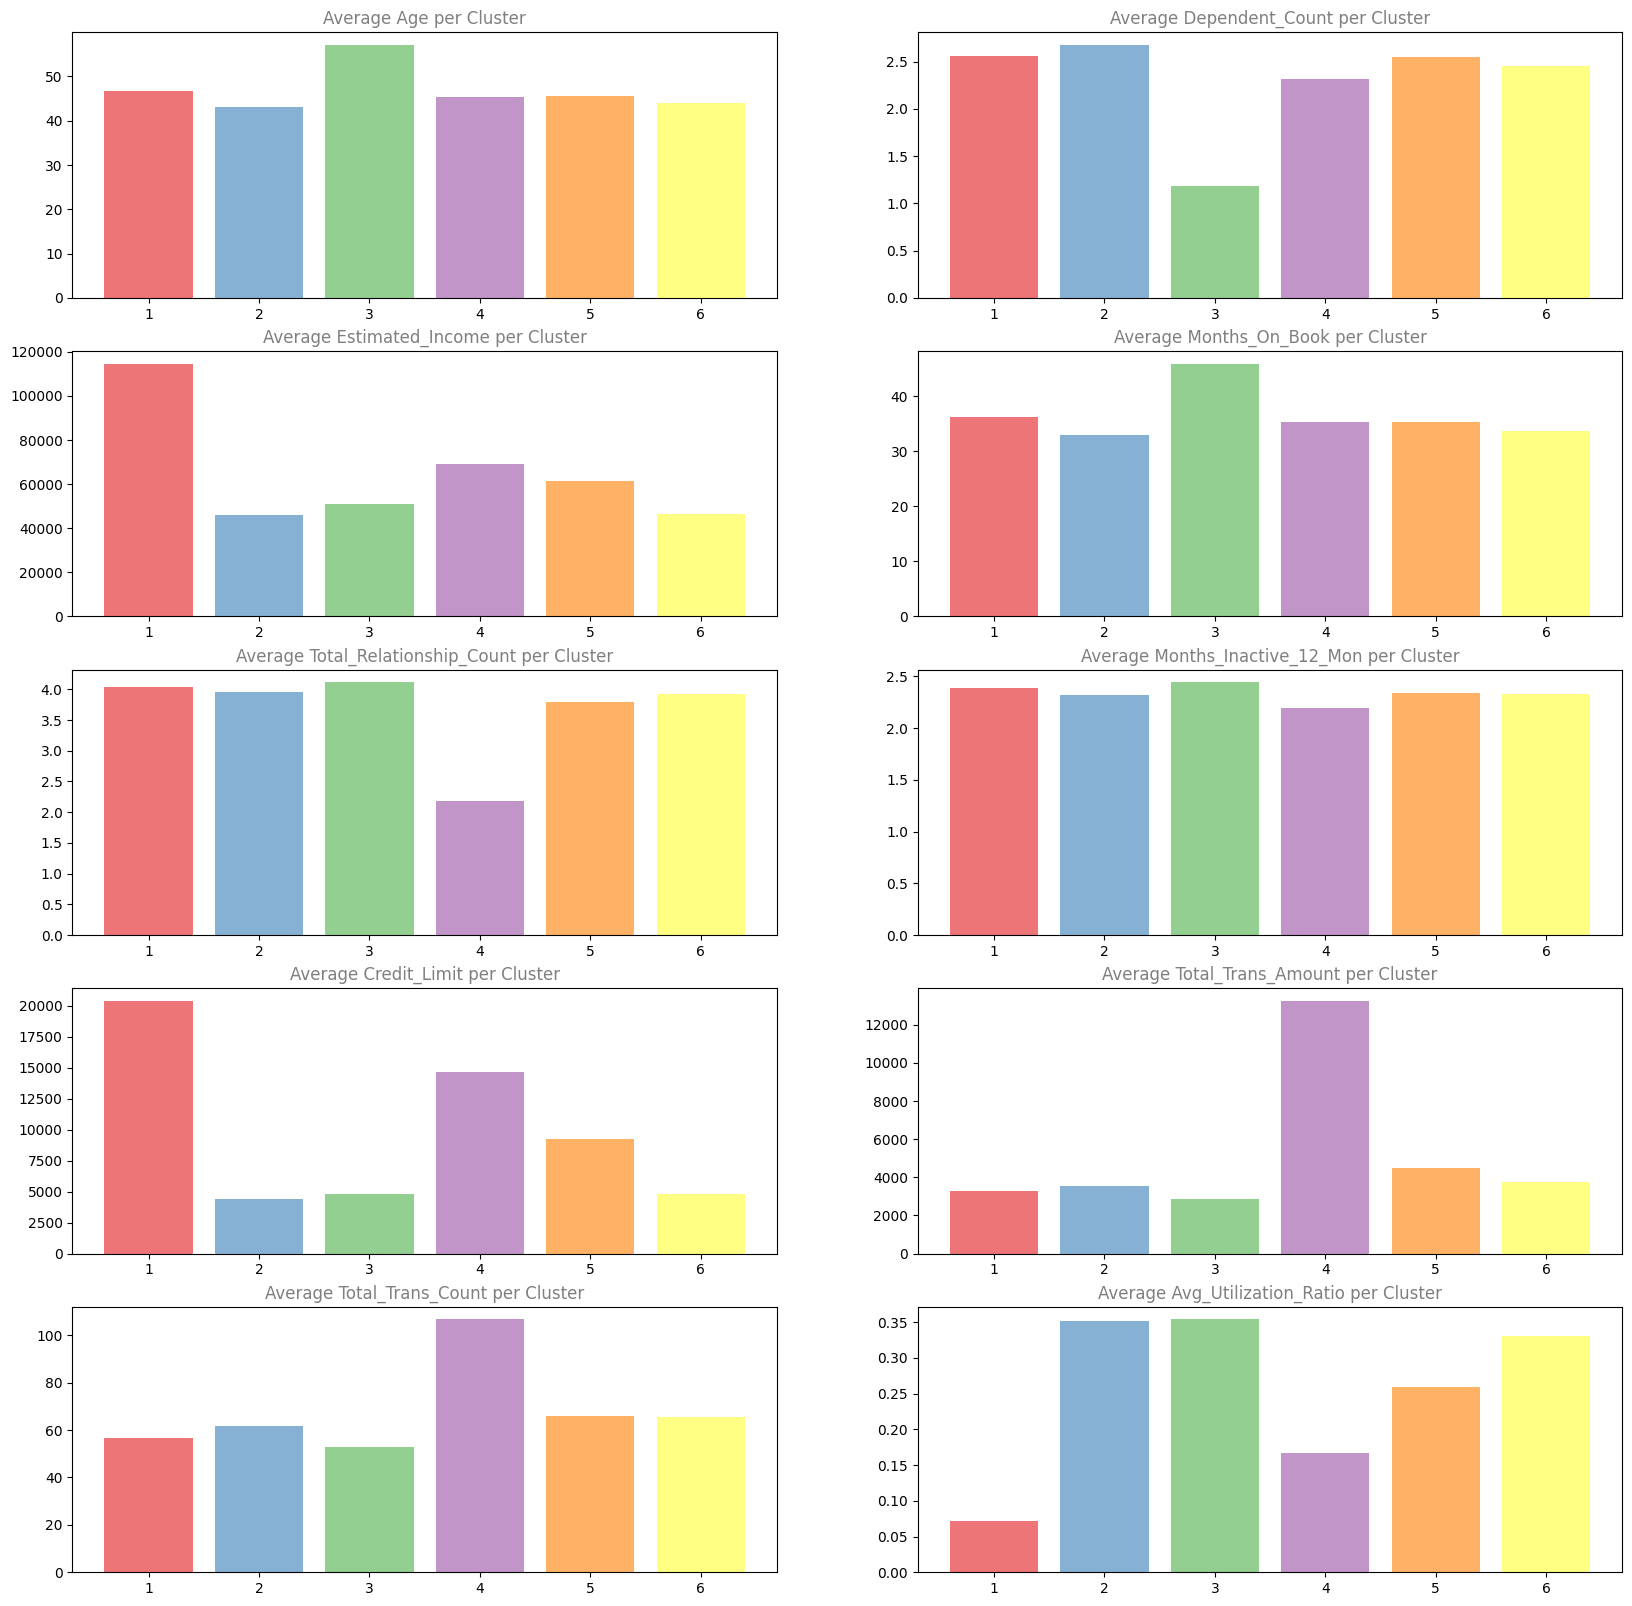

In [43]:
numeric_columns = customers.select_dtypes(include=np.number).drop(['customer_id','CLUSTER'],axis=1).columns.tolist()
fig = plt.figure(figsize=(20, 20))

for i, column in enumerate(numeric_columns):
    df_plot = customers.groupby('CLUSTER')[column].mean()
    ax = fig.add_subplot(5,2,i+1)
    ax.bar(df_plot.index,df_plot,color=sns.color_palette('Set1'), alpha=0.6)
    ax.set_title(f'Average {column.title()} per Cluster', alpha=0.5)
plt.show()    

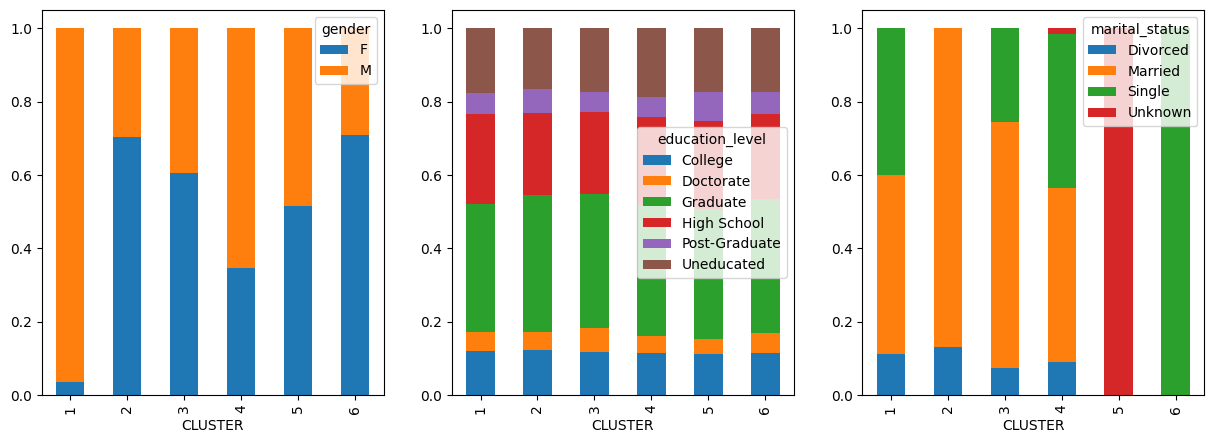

In [53]:
cat_columns = customers.select_dtypes(include='object')
fig = plt.figure(figsize=(15,5))

for i, col in enumerate(cat_columns):
    ax = fig.add_subplot(1,3,i+1)
    plot_df = pd.crosstab(index=customers['CLUSTER'], columns=customers[col], values=customers[col], aggfunc='size', normalize='index')
    plot_df.plot.bar(stacked=True, ax=ax)

# Final Insights

Cluster 1: Higher earning men with high credit limits, very low utilization ratio
Cluster 2: Mostly women, high utilization ratio, married
Cluster 3: Evenly divided genders, low credit limit, about average income, high utilization ratio, longest customers
Cluster 4: High earning men, high credit limits, lower utilization ratio, high transactions, they pay off their balances often
Cluster 5: Low credit, high utilization, average income
Cluster 6: Mostly women, almost all single, low credit limit, high utilization